<a href="https://colab.research.google.com/github/bchabros/machine_learning_bootcamp/blob/main/unsupervised/02_dimensionality_reduction/02_Pca_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, linewidth=150)

Załadowanie danych

In [93]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']
data[:3]

array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184,    0.2776,    0.3001,    0.1471,    0.2419,    0.0787,    1.095 ,    0.9053,
           8.589 ,  153.4   ,    0.0064,    0.049 ,    0.0537,    0.0159,    0.03  ,    0.0062,   25.38  ,   17.33  ,  184.6   , 2019.    ,
           0.1622,    0.6656,    0.7119,    0.2654,    0.4601,    0.1189],
       [  20.57  ,   17.77  ,  132.9   , 1326.    ,    0.0847,    0.0786,    0.0869,    0.0702,    0.1812,    0.0567,    0.5435,    0.7339,
           3.398 ,   74.08  ,    0.0052,    0.0131,    0.0186,    0.0134,    0.0139,    0.0035,   24.99  ,   23.41  ,  158.8   , 1956.    ,
           0.1238,    0.1866,    0.2416,    0.186 ,    0.275 ,    0.089 ],
       [  19.69  ,   21.25  ,  130.    , 1203.    ,    0.1096,    0.1599,    0.1974,    0.1279,    0.2069,    0.06  ,    0.7456,    0.7869,
           4.585 ,   94.03  ,    0.0062,    0.0401,    0.0383,    0.0206,    0.0225,    0.0046,   23.57  ,   25.53  ,  152.5   , 1709.    ,
          

In [94]:
target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
data.shape

(569, 30)

Standaryzacja

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:3]

array([[ 1.0971, -2.0733,  1.2699,  0.9844,  1.5685,  3.2835,  2.6529,  2.5325,  2.2175,  2.2557,  2.4897, -0.5653,  2.833 ,  2.4876, -0.214 ,
         1.3169,  0.724 ,  0.6608,  1.1488,  0.9071,  1.8867, -1.3593,  2.3036,  2.0012,  1.3077,  2.6167,  2.1095,  2.2961,  2.7506,  1.937 ],
       [ 1.8298, -0.3536,  1.686 ,  1.9087, -0.827 , -0.4871, -0.0238,  0.5481,  0.0014, -0.8687,  0.4993, -0.8762,  0.2633,  0.7424, -0.6054,
        -0.6929, -0.4408,  0.2602, -0.8055, -0.0994,  1.8059, -0.3692,  1.5351,  1.8905, -0.3756, -0.4304, -0.1467,  1.0871, -0.2439,  0.2812],
       [ 1.5799,  0.4562,  1.5665,  1.5589,  0.9422,  1.0529,  1.3635,  2.0372,  0.9397, -0.398 ,  1.2287, -0.7801,  0.8509,  1.1813, -0.297 ,
         0.815 ,  0.2131,  1.4248,  0.237 ,  0.2936,  1.5119, -0.024 ,  1.3475,  1.4563,  0.5274,  1.0829,  0.855 ,  1.955 ,  1.1523,  0.2014]])

PCA 2 Factory

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486],
       [ 2.3878, -3.7682],
       [ 5.7339, -1.0752],
       [ 7.123 , 10.2756],
       [ 3.9353, -1.9481]])

In [98]:
pca_2 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'class': target})
pca_2.replace(0, 'Benign', inplace=True)
pca_2.replace(1, 'Malignant', inplace=True)
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


In [99]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['components'] = results.index + 1
results

,explained_variance_ratio,cumulative,components
0,0.442720,0.442720,1
1,0.189712,0.632432,2


In [100]:
fig = go.Figure(data=[go.Bar(x=results['components'], y=results['explained_variance_ratio'],
                             name='explained_variance_ratio'),
                      go.Scatter(x=results['components'], y=results['cumulative'],
                                 name='cumulative')],
                layout=go.Layout(title='PCA - 2 Factors', width=900, template='plotly_dark'))
fig.show()

In [101]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=950, template='plotly_dark')

PCA - 3 Factory

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486, -1.1232],
       [ 2.3878, -3.7682, -0.5293],
       [ 5.7339, -1.0752, -0.5517],
       [ 7.123 , 10.2756, -3.2328],
       [ 3.9353, -1.9481,  1.3898]])

In [103]:
pca_3 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'pca_3': data_pca[:, 2], 'class': target})
pca_3.replace(0, 'Benign', inplace=True)
pca_3.replace(1, 'Malignant', inplace=True)
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,1.948581,-1.123158,Benign
1,2.387802,-3.768173,-0.529289,Benign
2,5.733896,-1.075174,-0.551746,Benign
3,7.122953,10.275590,-3.232792,Benign
4,3.935302,-1.948071,1.389763,Benign


In [104]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['components'] = results.index + 1
results

,explained_variance_ratio,cumulative,components
0,0.442720,0.442720,1
1,0.189712,0.632432,2
2,0.093932,0.726364,3


In [105]:
fig = go.Figure(data=[go.Bar(x=results['components'], y=results['explained_variance_ratio'],
                             name='explained_variance_ratio'),
                      go.Scatter(x=results['components'], y=results['cumulative'],
                                 name='cumulative')],
                layout=go.Layout(title='PCA - 3 Factors', width=900, template='plotly_dark'))
fig.show()

In [106]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class',
               opacity=0.7, size_max=10, width=950, template='plotly_dark')

Zbior danych MNIST

In [107]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [108]:
X_train = X_train[:5000]
y_train = y_train[:5000]

In [109]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [110]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Wizualizacja danych

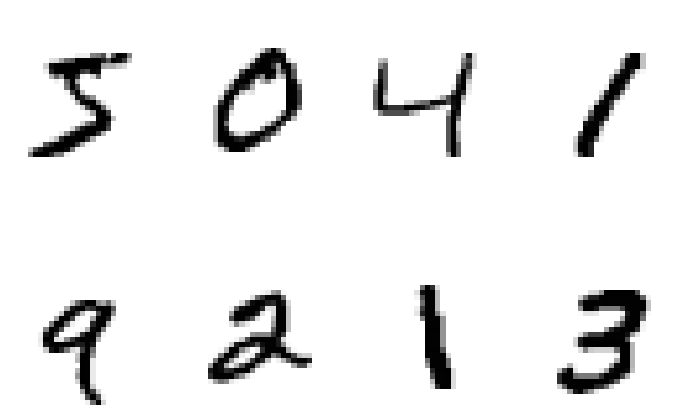

In [111]:
plt.figure(figsize=(12, 8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i], color='white', fontsize=17)
  plt.axis('off')
plt.show()

Standaryzacja

In [112]:
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(5000, 28, 28)

Wypłaszczenie danych

In [113]:
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(5000, 784)

In [114]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.4555,  1.4465, -0.1268],
       [ 4.0678,  1.5156,  2.1631],
       [-0.1116, -1.7779, -0.6184],
       [-3.4395,  2.3377,  0.6106],
       [-1.403 , -2.6951, -0.1721]])

Wyjaśniona wariancja

In [115]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['components'] = results.index + 1
results

,explained_variance_ratio,cumulative,components
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3


In [116]:
fig = go.Figure(data=[go.Bar(x=results['components'], y=results['explained_variance_ratio'],
                             name='explained_variance_ratio'),
                      go.Scatter(x=results['components'], y=results['cumulative'],
                                 name='cumulative')],
                layout=go.Layout(title='PCA - 3 Factors', width=900, template='plotly_dark'))
fig.show()

In [117]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,0.455497,1.446485,-0.126825,5.0
1,4.067764,1.515646,2.163068,0.0
2,-0.111570,-1.777879,-0.618435,4.0
3,-3.439495,2.337699,0.610620,1.0
4,-1.403014,-2.695138,-0.172090,9.0


In [118]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
              symbol='class', opacity=0.7, size_max=10, width=900, height=700,
              template='plotly_dark', title='PCA - MNIST dataset')

In [119]:
pca = PCA(n_components=0.90)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:1]

array([[ 0.4555,  1.4464, -0.1266, -2.0464, -0.9062,  0.8658,  0.7143,  0.3843,  1.2169, -0.5736,  0.2233, -1.8176, -1.0697,  2.8846,  0.0435,
         0.4055, -1.3517, -0.4881,  0.7439,  1.2559,  0.491 ,  0.8971,  0.7157,  0.7823, -0.2474, -0.3642,  1.3117,  0.4369,  0.4515, -0.1556,
        -0.5905,  0.0318, -0.0879, -0.1545, -0.1757, -0.4434,  0.7237, -0.3561,  0.4432,  1.7112,  0.2673, -0.8439, -0.3894, -0.1528, -0.044 ,
        -0.5125, -0.6194, -0.1968,  0.2109, -0.3994,  0.3107, -0.0907,  0.1361, -0.5926,  0.0147,  0.7161,  0.497 ,  0.6163, -0.2884, -0.1627,
         0.5686, -0.1277,  0.6545, -0.3407,  0.7817,  0.2586, -0.0567, -0.2488, -0.3312, -0.1065, -0.0352, -0.6306,  0.0124, -0.2624, -0.3622,
        -0.29  ,  0.0276,  0.2364,  0.1238, -0.0304, -0.0702, -0.2134, -0.0943,  0.0714]])

In [120]:
pca.n_components_

84

In [121]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['components'] = results.index + 1
results

,explained_variance_ratio,cumulative,components
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
79,0.001445,0.894545,80
80,0.001408,0.895952,81
81,0.001388,0.897340,82
82,0.001368,0.898708,83


In [122]:
fig = go.Figure(data=[go.Bar(x=results['components'], y=results['explained_variance_ratio'],
                             name='explained_variance_ratio'),
                      go.Scatter(x=results['components'], y=results['cumulative'],
                                 name='cumulative')],
                layout=go.Layout(title='PCA - 90% variation', width=900, template='plotly_dark'))
fig.show()

In [123]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [124]:
X_train = X_train[:5000]
y_train = y_train[:5000]
X_train[0].shape

(32, 32, 3)

In [125]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

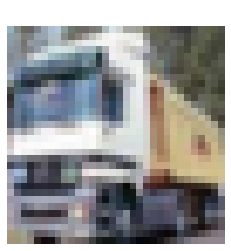

In [126]:
targets = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
           5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

plt.imshow(X_train[1])
plt.title(targets[y_train[1][0]], color='white', fontsize=17)
plt.axis('off')
plt.show()

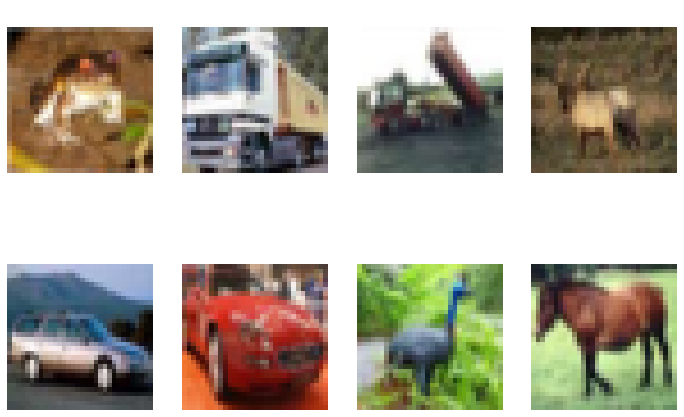

In [127]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i])
    plt.title(targets[y_train[i][0]], color='white', fontsize=17)
    plt.axis('off')
plt.show()

Standaryzacja

In [128]:
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(5000, 32, 32, 3)

In [134]:
X_train = X_train.reshape(-1, 32 * 32 * 3)
X_train.shape

(5000, 3072)

In [135]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.5023,   2.5505,   1.5772],
       [  0.8709,  -0.8715,   6.2163],
       [  8.111 , -11.1948,  -2.6912],
       [-10.3522,  -0.2394,   1.2522],
       [ -2.4619,  -4.8347,   1.2479]])

Wyjaśniona wariancja

In [136]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3


In [137]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [138]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['name'] = X_train_pca_df['class'].map(targets)
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class,name
0,-6.502318,2.550480,1.577221,6.0,frog
1,0.870890,-0.871500,6.216324,9.0,truck
2,8.111013,-11.194790,-2.691174,9.0,truck
3,-10.352160,-0.239424,1.252194,4.0,deer
4,-2.461939,-4.834697,1.247863,1.0,automobile


In [139]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='name', 
              symbol='name', opacity=0.7, size_max=10, width=950, height=700,
              title='PCA - CIFAR dataset', template='plotly_dark')

PCA 90% wariancji

In [141]:
pca = PCA(n_components=0.90)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:1]

array([[-6.5023,  2.5505,  1.5772,  2.8171, -4.689 ,  1.0893, -0.3166, -0.3928,  3.1677, -0.9979,  0.2916, -0.17  , -0.0868, -0.3047,  0.887 ,
        -0.7984,  0.4836, -0.0692,  0.5311,  0.7149, -0.4497, -1.3223, -0.2011, -1.589 , -0.1546,  0.6288,  1.0733,  0.1725,  1.5402, -0.6995,
        -0.3199, -0.9693,  0.0179,  0.4488, -0.2715,  1.4752, -0.4041,  0.7392, -0.1002,  0.0154,  0.8168,  0.6638, -0.7012, -0.3257,  0.2252,
         0.1063, -0.1499,  0.7627, -0.0492,  1.0742,  0.0448, -0.6756, -0.0336, -0.925 ,  0.5862,  0.0813, -0.2281,  0.0017,  0.3966,  0.3775,
         0.4023, -0.7372,  0.3825,  0.099 ,  0.2561,  0.4095, -0.6717, -0.7232,  0.5812,  0.5109, -0.356 ,  0.0116, -0.1865,  0.0445,  0.2776,
         0.3037, -0.159 , -0.0083, -0.1422,  0.6091, -0.1363, -0.3946, -0.007 ,  0.22  , -0.0755, -0.7125,  0.2949,  0.4077,  0.2385,  0.5077,
         0.3033, -0.5686, -0.1122,  0.3958,  0.624 ]])

In [143]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3
3,0.037136,0.507891,4
4,0.035443,0.543334,5
...,...,...,...
90,0.000875,0.897128,91
91,0.000861,0.897989,92
92,0.000852,0.898841,93
93,0.000839,0.899680,94


In [145]:
pca.n_components_

95

In [146]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 90% variation', width=950, template='plotly_dark'))
fig.show()